# K-Means 

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [60]:
from sklearn.datasets import make_blobs

In [73]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=6)

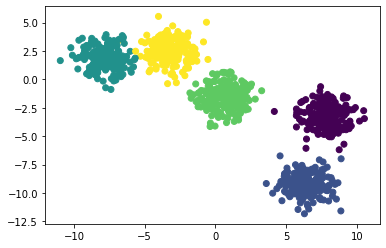

In [74]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [75]:
# k means implementation

In [76]:
k=5
color=["green","red","blue","yellow","gray"]
clusters={}
for i in range(k):
    center=10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    
    cluster={
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i]=cluster

In [77]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))


In [78]:
#step 2
#assign every data points to one of its clusters
#E-step(expectation step)
def assignPointToClusters(clusters):
    for i in range(X.shape[0]):
        dist=[]
        curr_x=X[i]
        
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
            
            #minimum distance
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)



In [79]:
#step3 
#update cluster center according to mean value of data points
#M-step(maximization step)

In [80]:
def updateClusterCenter(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0 :
            mu=pts.mean(axis=0)
            clusters[kx]['center']=mu
            clusters[kx]['points']=[] #clear the list
            

In [81]:
def plotClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        #plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        # plot the cluster center
        uk=clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color='black', marker="*")
        
            

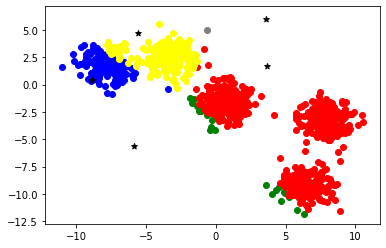

In [82]:
assignPointToClusters(clusters)
plotClusters(clusters)

In [83]:
# repeat these three functions few times
count=1
while True:
    assignPointToClusters(clusters)
    updateClusterCenter(clusters)
    count+=1
    if count>100:
        break

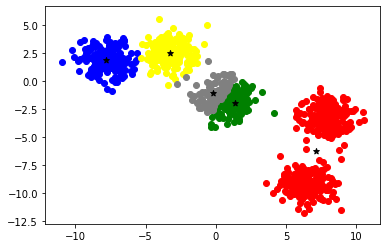

In [84]:
assignPointToClusters(clusters)
plotClusters(clusters)